## Homework 3

##### Task: Implement linear regression
##### Data: Housing data from Kings County, Washington from Kaggle

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

#### Mean Squared Error Function (Loss Function)

In [2]:
# Mean Squared Error

# y' = mx + b
# weight = m (the predicted slope)
# bias = b (the predicted y-intercept)

def mse(dataframe: pd, x_column: str, y_column: str, weight: int, bias: int):
    data_length = len(dataframe[x_column])
    sum_error = 0
    for i in range(data_length):
        x_value = dataframe.at[i, x_column]
        y_value = dataframe.at[i, y_column]
        sum_error += ((bias + (weight * x_value) - y_value) ** 2)
    
    cost = (1 / data_length) * sum_error
    
    return cost

#### Gradient Descent Function

In [3]:
def gradient_descent(dataframe: pd, 
                     x_column: str, 
                     y_column: str,
                     weight = 0,
                     bias = 0,
                     rate = 0.0001,
                     epochs = 1000, 
                     error_list = False,
                     error_step = 100
                    ):
    
    mse_list = []    
    
    new_weight = weight
    new_bias = bias
    
    data_length = len(dataframe[x_column])
    
    # Gradient descent portion
    for i in range(epochs):
        w_total_partial_sum = 0
        b_total_partial_sum = 0
        
        for j in range(data_length):
            x_value = dataframe.at[j, x_column]
            y_value = dataframe.at[j, y_column]
            y_pred = (new_weight * x_value) + new_bias
            
            w_total_partial_sum += (x_value * (y_value - y_pred))
            b_total_partial_sum += (y_value - y_pred)
        
        der_w = (-2 / data_length) * w_total_partial_sum
        der_b = (-2 / data_length) * b_total_partial_sum
        
        new_weight = new_weight - rate * der_w
        new_bias = new_bias - rate * der_b
        
        
        if error_list == True and i % error_step == 0 :
            error = mse(dataframe, x_column, y_column, new_weight, new_bias)
            mse_list.append(error)
    if error_list == True:
        return (new_weight, new_bias, mse_list)
    else:
        
        return (new_weight, new_bias)

#### Exploring the housing data 

In [4]:
# Importing csv file to dataframe
housing_df = pd.read_csv("housing.csv")
housing_df = housing_df.head(500)
housing_df = housing_df[['sqft_living','price']]

In [5]:
housing_df.shape

(500, 2)

In [6]:
housing_df.head()

,sqft_living,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0


In [7]:
housing_df.isnull().sum()

sqft_living    0
price          0
dtype: int64

#### The relationship between "sqft_living" and "price" appears to be somewhat linear based on the pairplot above. This is what we will use.

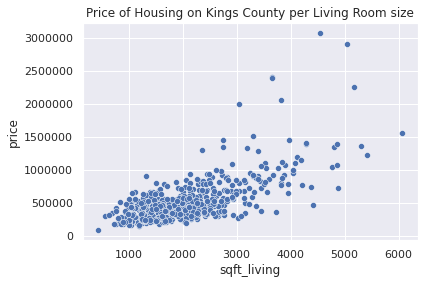

In [8]:
ax = sns.scatterplot(data=housing_df, x = "sqft_living", y = "price")

plt.ticklabel_format(style='plain', axis='y')
plt.title("Price of Housing on Kings County per Living Room size")
plt.show()

#### Testing MSE function with hosing data

In [9]:
# Predicted Line
slope = 500
intercept = 0

housing_mse = mse(housing_df, "sqft_living", "price", slope, intercept)
print("Mean Squared Error:", housing_mse)

Mean Squared Error: 386404978134.912


#### Testing Gradient Descent Function

In [10]:
# Give it about 10 sec to compute
# Decreasing the learning rate (rate) will give overflow error (due to dataset size + large values)
p_slope, p_intercept, error_y = gradient_descent(housing_df, "sqft_living", "price", 0, 0, 0.0000001, 1000, True)

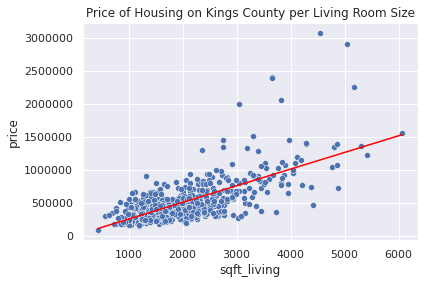

In [11]:
# Graphing new weight and bias
y_pred = p_slope * housing_df["sqft_living"] + p_intercept

x_values = housing_df["sqft_living"]
y_values = housing_df["price"]

ax = sns.scatterplot(data=housing_df, x = "sqft_living", y = "price");
plt.plot([min(x_values), max(x_values)], [min(y_pred), max(y_pred)], color='red') # predicted
plt.ticklabel_format(style='plain', axis='y')
plt.title("Price of Housing on Kings County per Living Room Size")

plt.show()

#### Graphing MSE improvement

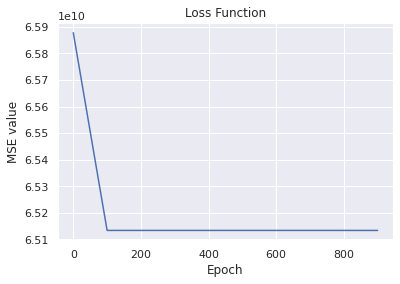

In [12]:
error_x = []
for i in range(1000):
    if i % 100 == 0:
        error_x.append(i)

plt.plot(error_x, error_y)
plt.title("Loss Function")
plt.xlabel("Epoch")
plt.ylabel("MSE value")
plt.show()